In [8]:
import torch
from models.Models import Models

In [9]:
Models.available.keys()

dict_keys(['lenet5', 'resnet32', 'resnet18', 'mobilenetv3', 'vgg'])

AttributeError: module 'models.Models' has no attribute 'available'

In [11]:
import random

def generate_list(n, values):
    # Check if the desired size is larger than the available values
    if n > len(values):
        raise ValueError("Desired size is larger than the available values.")

    # Generate a random sample of size n from the values
    return random.sample(values, n)

# Example usage
# available_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
desired_size = 6

result = generate_list(desired_size, list(Models.available.keys()))
print(result)

ValueError: Desired size is larger than the available values.

In [12]:
def generate(model_list, num_clients):
    strategy = [None] * num_clients
    for i in range(num_clients):
        strategy[i] = random.choice(model_list)
    return strategy

In [18]:
generate(list(Models.available.keys()), 10)

['mobilenetv3',
 'resnet18',
 'lenet5',
 'lenet5',
 'resnet32',
 'resnet18',
 'resnet32',
 'vgg',
 'vgg',
 'lenet5']

In [21]:
import random
def generate(model_list, num_clients):
    return random.choices(model_list, k=num_clients)

In [30]:
strategy = generate(list(Models.available.values()), 10)

In [37]:
num_clients = 5

In [40]:
[Models.ResNet18] * (num_clients // 2) + [Models.ResNet32] * (num_clients - (num_clients // 2))

[<function models.Models.Models.ResNet18()>,
 <function models.Models.Models.ResNet18()>,
 <function models.Models.Models.ResNet32()>,
 <function models.Models.Models.ResNet32()>,
 <function models.Models.Models.ResNet32()>]

In [34]:
random.choice(list(Models.available.values()))()

models.vgg.VGG19

In [1]:
foo = [1,2,3,4,5,6,7,8,9,10]

In [3]:
foo[1:]

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
device_ids = [0, 1, 2, 3]  # List of GPU device IDs to use

for i, (model, device_id) in enumerate(zip(["model1", "model2", "model3", "model4", "model5", "model6", "model7", "model8"], device_ids)):
    print(model, device_id)

model1 0
model2 1
model3 2
model4 3


In [5]:
import torch
from torchvision.datasets import ImageFolder    
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.datasets import CIFAR10


In [131]:
train_transform = transforms.Compose([
            transforms.Resize((32,32)),
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            # transforms.Normalize(mean=self.mean, std=self.std),
        ])
dataset = CIFAR10('dataset/',train=True, download=True, transform=train_transform)

Files already downloaded and verified


In [17]:
dataset.train_list

[['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
 ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
 ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
 ['data_batch_4', '634d18415352ddfa80567beed471001a'],
 ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb']]

In [ ]:
def random_split(self, training_data):
    """
    Splits training data into client datasets based on num_clients and splitting strategy
    
    Args:
        training_data (torch.utils.data.Dataset): training data
    Returns:
        client_data (list): list of client datasets
    """
    if self.equal_split:
        return random_split(training_data, [len(training_data) // self.num_clients] * self.num_clients)
    
def homogeneous_split(self, trainig_data):
    return None
    
def dirichlet_split(self, training_data):
    return None


In [132]:
from torchvision import datasets, transforms
from torch.utils.data import Subset, random_split

def create_balanced_subsets(dataset, num_subsets):
    # Calculate the number of samples per class in each subset
    samples_per_class = len(dataset) // num_subsets
    remainder = len(dataset) % num_subsets

    # Split the original dataset into num_subsets subsets with balanced classes
    class_counts = [0] * 10  # CIFAR10 has 10 classes
    subset_indices = [[] for _ in range(num_subsets)]
    for i, (data, target) in enumerate(dataset):
        if class_counts[target] < samples_per_class:
            subset_indices[i % num_subsets].append(i)
            class_counts[target] += 1
        elif remainder > 0:
            subset_indices[i % num_subsets].append(i)
            class_counts[target] += 1
            remainder -= 1

    # Create Subset objects for each subset
    subsets = [Subset(dataset, indices) for indices in subset_indices]

    return subsets


In [133]:
subsets = create_balanced_subsets(dataset, 6)

In [134]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(self, dataset):
    class_counts = [[0] * 10 for _ in range(len(dataset))]
    for i, subset in enumerate(dataset):
        for _, target in subset:
            class_counts[i][target] += 1

    # Plotting
    x = [i for i in range(self.num_clients) for _ in range(self.num_classes)]
    y = [j for _ in range(self.num_clients) for j in range(self.num_classes)]
    flattened_list = [element for sublist in class_counts for element in sublist]
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, flattened_list, alpha=0.4)

    plt.show()



In [153]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset):
    # dataset = subsets
    class_labels = [str(i) for i in range(10)]  # CIFAR10 class labels

    subset_labels = [f"Subset {i+1}" for i in range(len(dataset))]
    subset_sizes = [len(subset) for subset in dataset]

    class_counts = [[0] * 10 for _ in range(len(dataset))]
    for i, subset in enumerate(dataset):
        for _, target in subset:
            class_counts[i][target] += 1

    # Plotting
    num_subsets = len(subsets)
    num_classes = len(class_labels)

    x = [i for i in range(num_subsets) for _ in range(num_classes)]
    y = [j for _ in range(num_subsets) for j in range(num_classes)]
    flattened_list = [element for sublist in class_counts for element in sublist]


    max_val = max(flattened_list)

    scaled_lst = []
    for value in flattened_list:
        scaled_value = (value / max_val) * 699
        scaled_lst.append(scaled_value)
    # print(flattened_list[0])
    color_range = scaled_lst.copy()
    for i in range(len(color_range)):
        color_range[i] = 6 - color_range[i] // 100

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=scaled_lst, alpha=0.4, c=color_range, cmap='winter')
    ax.set_title(r'Label Distribution $\alpha$ = 0.1')
    ax.set_ylabel('Label')
    ax.set_xlabel('Client ID')

    plt.show()

# plot_class_distribution(subsets)


In [152]:
max(color_range)

6.0

In [123]:
print(r'Label Distribution $\Alpha$')

Label Distribution $\Alpha$


In [32]:
x = []
num_clients = 6
for i in range(num_clients):
    x.append([i]*10)

In [90]:
import numpy as np

def dirichlet_split(dataset, n_clients, beta=0.1):

    label_distributions = []
    for y in range(len(dataset.classes)):
        label_distributions.append(np.random.dirichlet(np.repeat(beta, n_clients)))

    labels = np.array(dataset.targets).astype(int)
    client_idx_map = {i: {} for i in range(n_clients)}
    client_size_map = {i: {} for i in range(n_clients)}

    for y in range(len(dataset.classes)):
        label_y_idx = np.where(labels == y)[0]
        label_y_size = len(label_y_idx)

        sample_size = (label_distributions[y] * label_y_size).astype(int)
        sample_size[n_clients - 1] += len(label_y_idx) - np.sum(sample_size)
        for i in range(n_clients):
            client_size_map[i][y] = sample_size[i]

        np.random.shuffle(label_y_idx)
        sample_interval = np.cumsum(sample_size)
        for i in range(n_clients):
            client_idx_map[i][y] = label_y_idx[(sample_interval[i - 1] if i > 0 else 0):sample_interval[i]]

    subsets = []
    for i in range(n_clients):
        client_i_idx = np.concatenate(list(client_idx_map[i].values()))
        np.random.shuffle(client_i_idx)
        subsets.append(Subset(dataset, client_i_idx))

    return subsets

In [95]:
subsets_dir = dirichlet_loaders(dataset, 6, 0.1)

In [96]:
len(subsets_dir[0])

6187

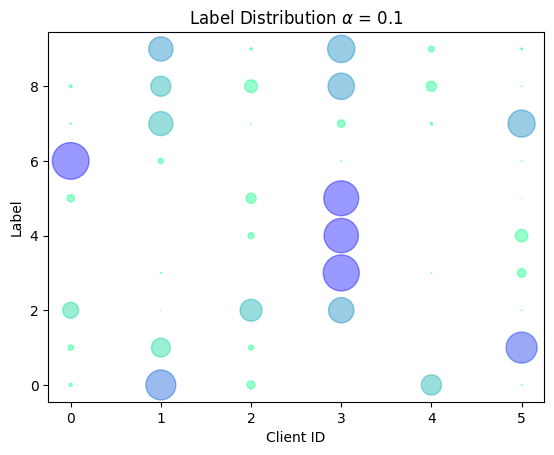

In [154]:
plot_class_distribution(subsets_dir)

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def plot_class_distribution_speed(subsets):
    class_labels = np.arange(10).astype(str)  # CIFAR10 class labels

    class_counts = np.zeros((len(subsets), 10), dtype=int)
    for i, subset in enumerate(subsets):
        targets = np.array([target for _, target in subset])
        class_counts[i] = np.bincount(targets, minlength=10)

    # Plotting
    num_subsets = len(subsets)
    num_classes = len(class_labels)

    x = np.repeat(np.arange(num_subsets), num_classes)
    y = np.tile(np.arange(num_classes), num_subsets)
    flattened_list = class_counts.flatten()

    fig, ax = plt.subplots()
    ax.scatter(x, y, flattened_list, alpha=0.4, cmap='viridis')

    plt.show()


/var/folders/rq/q7pyc51x2dvd2cvpry9lm6640000gq/T/ipykernel_27206/1749138914.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, flattened_list, alpha=0.4, cmap='viridis')


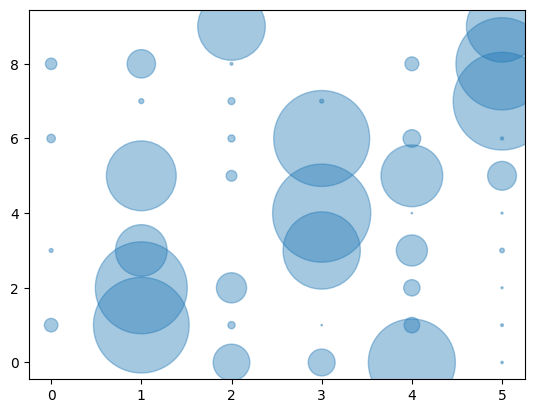

In [66]:
plot_class_distribution_speed(subsets_dir)

In [100]:
dataset_id = "cifar10"
num_classes = 10 if (dataset_id == "cifar10") else 100

In [118]:
lst = [50, 100, 100, 124, 300, 234, 543]


In [120]:
for i in range(len(lst)):
    lst[i] = lst[i] // 100

In [3]:
foo = {}
del foo

In [2]:
foo["test"].append(1)

KeyError: 'test'

In [5]:
num_devices = 6
foo = dict(zip(range(num_devices), [[] for _ in range(num_devices)]))

In [6]:
foo

{0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

In [10]:
device_dict = {0 : ['client1', 'client2', 'client3'], 1 : ['client4', 'client5', 'client6'], 2: ['client7', 'client8']}

In [11]:
device_dict

{0: ['client1', 'client2', 'client3'],
 1: ['client4', 'client5', 'client6'],
 2: ['client7', 'client8']}

In [17]:
# get element from each item in dict
for i, (key, value) in zip(range(3), device_dict.items()):
    print(i)

0
1
2


In [20]:
for i in range(3):
    for key, value in device_dict.items():
        if i < len(value):
            print(key, value[i])

0 client1
1 client4
2 client7
0 client2
1 client5
2 client8
0 client3
1 client6


In [21]:
for i in range(3):
    for values in zip(*device_dict.values()):
        if i < len(values):
            print(values[i])

client1
client2
client4
client5
client7
client8


In [19]:
device_ids = [0, 1, 2, 3]  # List of GPU device IDs to use

processes = []
for i, (model, device_id) in enumerate(zip(["model1", "model2", "model3", "model4", "model5", "model6", "model7", "model8"], device_ids)):
    print(i, model, device_id)

0 model1 0
1 model2 1
2 model3 2
3 model4 3


In [22]:
8//3

2

In [25]:
import math
math.ceil(8/3)

3

In [37]:
'''ResNet in PyTorch.

For Pre-activation ResNet, see 'preact_resnet.py'.

Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 128

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

In [32]:
test()

torch.Size([1, 10])


In [49]:
net = ResNet18()
y = net(torch.randn(1, 3, 63, 63))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2048 and 512x10)

In [48]:
y

tensor([[-0.4017, -0.3452,  0.3939,  0.7452,  0.1936, -0.0400,  0.4256,  0.7276,
         -0.2523,  0.3377]], grad_fn=<AddmmBackward0>)

In [43]:
y

tensor([[ 0.0951,  0.9426, -0.4347, -0.0144, -0.8422, -0.4137,  0.4417,  0.6024,
         -1.0984, -0.0241]], grad_fn=<AddmmBackward0>)

In [53]:
import torchvision
del model
model = torchvision.models.resnet18(pretrained=False, num_classes=10)

/Users/colin/miniconda3/envs/fed-diff/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/colin/miniconda3/envs/fed-diff/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [54]:
model(torch.randn(1, 3, 32, 32))

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 512, 1, 1])

In [1]:
from models import resnet

In [2]:
model = resnet.ResNet18(10)

In [4]:
import torch
model.eval()
model(torch.randn(1, 3, 32, 32))

tensor([[-0.5216, -0.2403, -0.0904,  0.1223, -0.3682, -0.3373, -0.2741, -0.0624,
         -0.0639, -0.3151]], grad_fn=<AddmmBackward0>)

In [7]:
params = {"lr": 0.1, "momentum": 0.9, "weight_decay": 5e-4}

In [8]:
params.lr

AttributeError: 'dict' object has no attribute 'lr'